# Creando gráficas con Matplotlib y Seaborn
Este Jupyter contiene información acerca de como generar y configurar gráficas para análisis de datos. Usaremos Pandas para cargar los datos, y Matplotlib + Seaborn para visualización.

Imports básicos:
- Pandas, para manejo de datos
- Matplotlib, para crear gráficas básicos
- Seaborn, para crear gráficas más avanzadas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Cargamos los datos como lo hemos hecho antes. Usamos el dataset de clima de seattle de 2012 a 2015.

In [2]:
seattle_weather = pd.read_csv("seattle-weather.csv")

In [3]:
seattle_weather

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


## Matplotlib: plt.plot() y otros comandos generales
El comando más básico de matplotlib is plt.plot() (recordando que plt. es matplotlib.pyplot.). Esto genera una gráfica de línea 2D. Podemos meter directamente una columna de Pandas para automáticamente asignar el eje x a los índices, y el eje y a la variable.

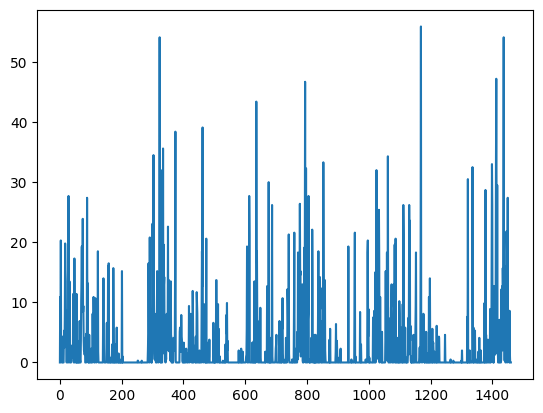

In [4]:
plt.plot(seattle_weather["precipitation"]) # (x,y) (x,y)-> o una lista
plt.show()

Normalmente en la línea de comando, usamos plt.show() para desplegar nuestra gráfica. En Jupyter y en Colab, podemos saltarnos este paso debido a que automáticamente desplegamos la salida del último comando (que será una gráfica). 

Mientras nuestra figura esté cargada, podemos modificar sus atributos con muchos comandos:
- plt.xlabel("String"): Pone un nombre al eje x. Podemos usar ylabel de la misma manera para el eje y.
- plt.title("String"): Pone un título a nuestra gráfica.
- plt.grid(bool): Activa o desactiva la cuadrícula de nuestra gráfica.

Vamos a ver otros parámetros de estas funciones y otras conforme avancemos.

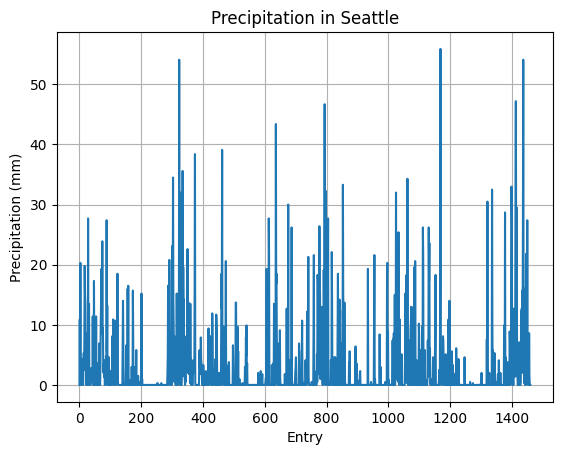

In [5]:
plt.plot(seattle_weather["precipitation"])
plt.xlabel("Entry")
plt.ylabel("Precipitation (mm)")
plt.title("Precipitation in Seattle")
plt.grid(True)

Matplotlib admite definir un "estilo rápido" por medio del siguiente formato:
- plt.plot(data, "format")

Format acepta un string de la siguiente manera:
- Una letra para color (por ejemplo, r = red, g = green, etc.)
- Un marcador (por ejemplo, "." para puntos, "--" para línea con guiones, "*" para estrellas, etc.)

Aquí hay una lista no completa de estilos:

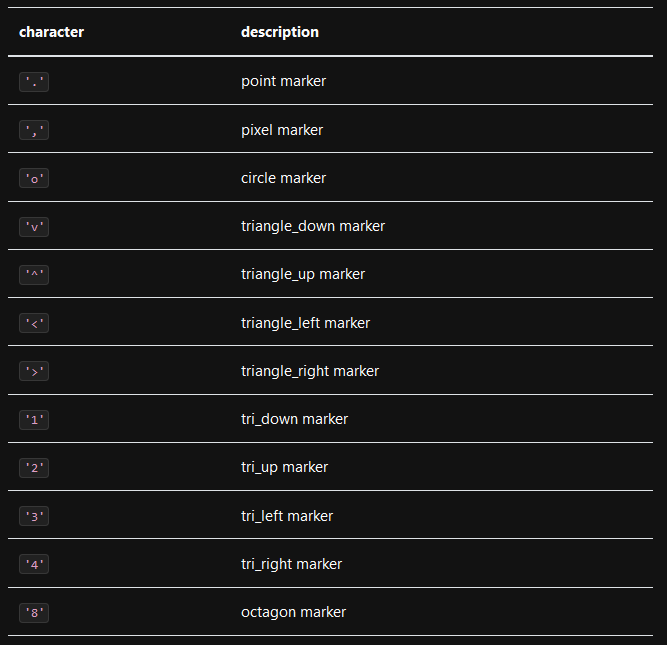
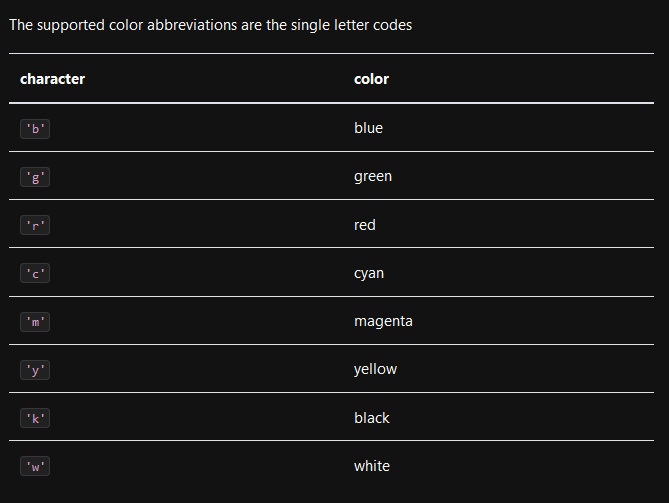

Si queremos marcadores de círculos rojos, por ejemplo, nuestro formato sería:
- plt.plot(data, "ro")

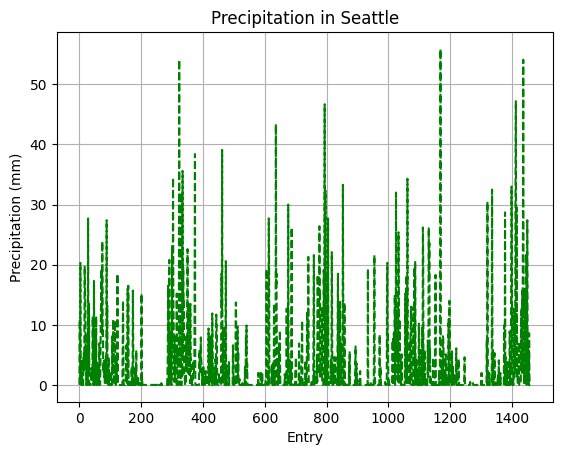

In [6]:
plt.plot(seattle_weather["precipitation"], 'g--')
plt.xlabel("Entry")
plt.ylabel("Precipitation (mm)")
plt.title("Precipitation in Seattle")
plt.grid(True)

Si queremos tener mayor control sobre nuestros estilos, podemos definir un color específico:
- plt.plot(data, color=string o RGB)

Los strings pueden ser nombres comúnes de colores i.e. "red", "blue", "magenta", etc.
También podemos poner cualquier color arbitrario con un tuple 1x3 de colors **R**ed, **G**reen, y **B**lue. En este caso, el verde sería (0,1,0).

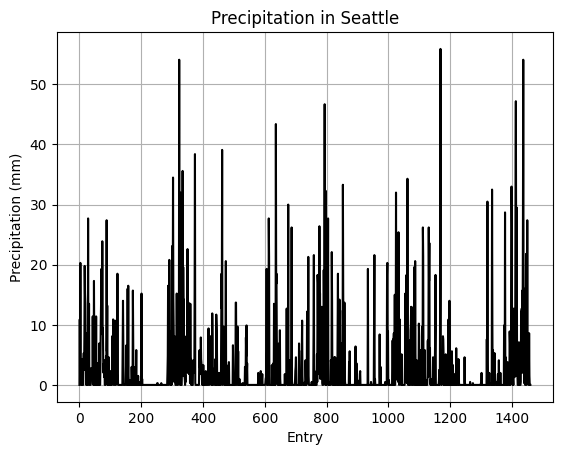

In [7]:
plt.plot(seattle_weather["precipitation"], color=(0.0,0.0,0.0))
plt.xlabel("Entry")
plt.ylabel("Precipitation (mm)")
plt.title("Precipitation in Seattle")
plt.grid(True)

De la misma manera, podemos definir los marcadores de manera separada. Matplotlib admite una clase de objeto llamada "MarkerStyle" si queremos modificar todavía más el marcado, pero normalmente es suficiente usar un string para definir el tipo de marcador que queremos.

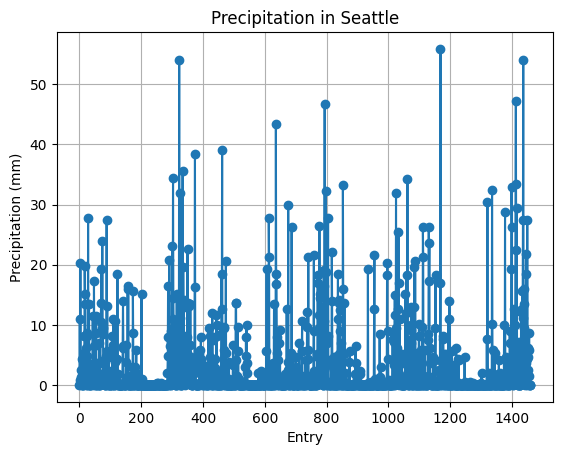

In [8]:
plt.plot(seattle_weather["precipitation"], marker='o') # -> MarketStyle
plt.xlabel("Entry")
plt.ylabel("Precipitation (mm)")
plt.title("Precipitation in Seattle")
plt.grid(True)

Además, tenemos control completo sobre la manera en la que el texto es presentado en los ejes (y en cualquier parte de la gráfica). Algunos parámetros en común:
- size=tamaño de fuente)
- weight="bold": Se usa un string para hacer las letras más o menos gruesas. Otros interesantes: "light", "ultrabold", "ultralight"
- **kwargs: Pasa un diccionario de argumentos al generador de texto. Comúnmente, lo podemos usar para definir la fuente usando {"fontname":"Nombre comun de la Fuente"}.
- style="italics"

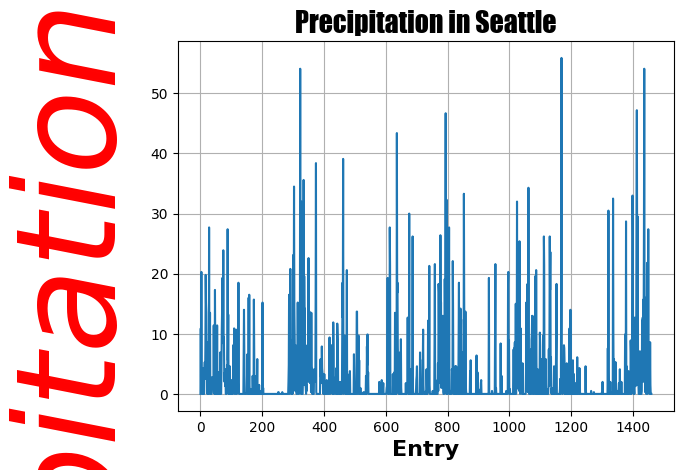

In [9]:
plt.plot(seattle_weather["precipitation"])
plt.xlabel("Entry", size=16, weight="bold")
plt.ylabel("Precipitation (mm)", size=100, color='red', style='italic')
fontname = {'fontname':'Impact'}
plt.title("Precipitation in Seattle", size=20, **fontname)
plt.grid(True)

Algo muy accessible de matplotlib es el superponer gráficas. Todas las gráficas que se manden a llamar (ya sea con plt.plot() o cualquier comando similar) se puede graficar bajo los mismos ejes. Cuando se hace esto, un comando útil es plt.legend():
- plt.legend(["lista de", "plots", "a poner en leyenda"])

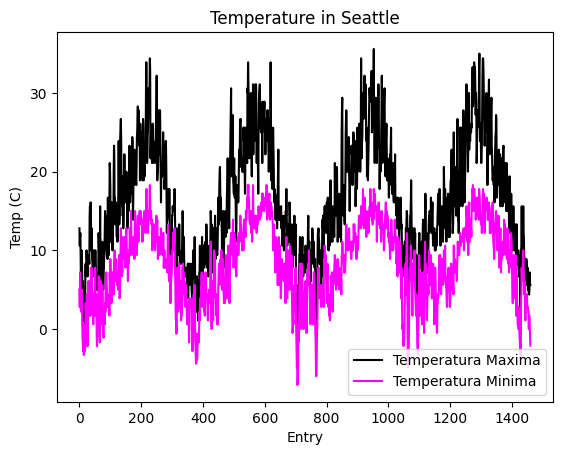

In [10]:
plt.plot(seattle_weather["temp_max"], color="black") # 1
plt.plot(seattle_weather["temp_min"], color="magenta") # 2
plt.xlabel("Entry")
plt.ylabel("Temp (C)")
plt.title("Temperature in Seattle")
plt.legend(["Temperatura Maxima" , "Temperatura Minima"])

Si tenemos un eje en común, Matplotlib automáticamente los mezcla. 

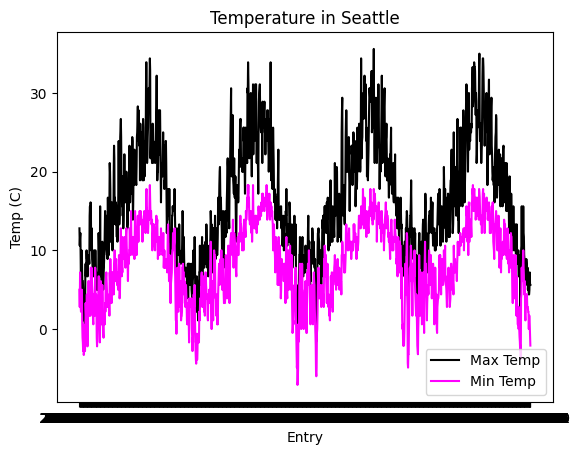

In [11]:
plt.plot(seattle_weather["date"], seattle_weather["temp_max"], color="black")
plt.plot(seattle_weather["date"], seattle_weather["temp_min"],  color="magenta")
plt.xlabel("Entry")
plt.ylabel("Temp (C)")
plt.title("Temperature in Seattle")
plt.legend(["Max Temp", "Min Temp"])

Matplotlib automáticamente puede acomodar objetos datetime basado en una recta numérica, permitiendo poner un eje x usando fechas sin aglomerar strings como arriba.

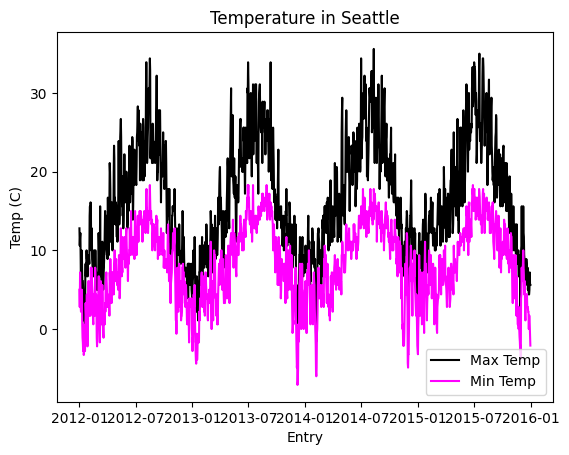

In [12]:
plt.plot(pd.to_datetime(seattle_weather["date"]), seattle_weather["temp_max"], color="black")
plt.plot(pd.to_datetime(seattle_weather["date"]), seattle_weather["temp_min"],  color="magenta")
plt.xlabel("Entry")
plt.ylabel("Temp (C)")
plt.title("Temperature in Seattle")
plt.legend(["Max Temp", "Min Temp"])

Todavía más comandos útiles:
- plt.figure(figsize=(anchura, altura): Ojo, es en pulgadas!
- plt.xticks(args): Para cambiar las propiedades (y hasta los valores...) de los marcadores del eje correspondiente. weight y size se pueden usar para cambiar el texto, como normal. Tambien se puede usar yticks!

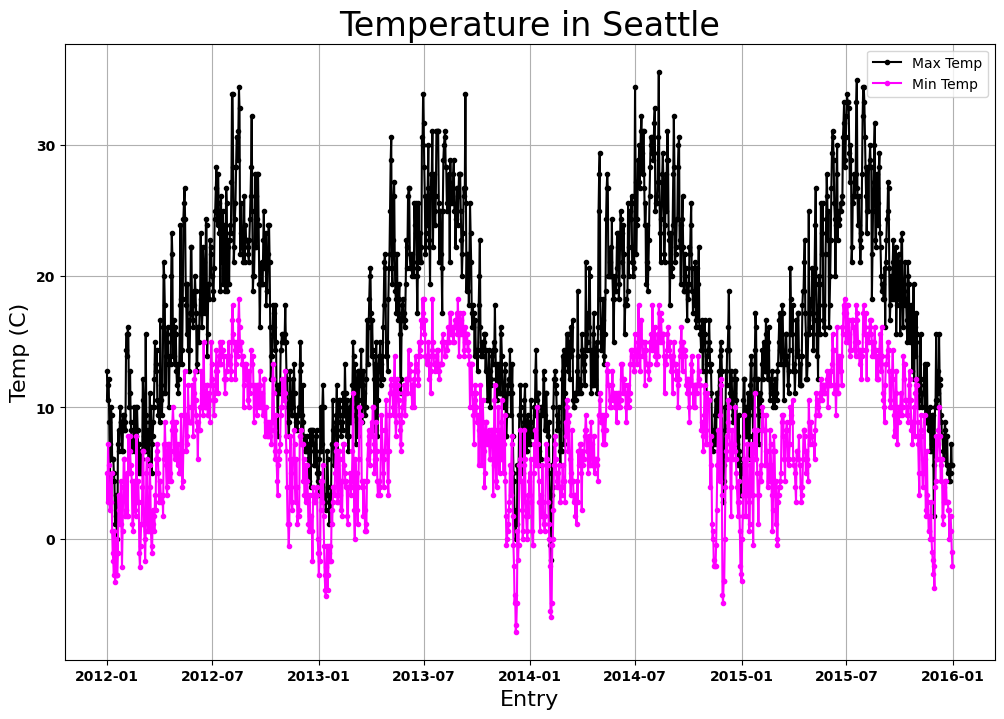

In [13]:
plt.figure(figsize=(12,8))
plt.plot(pd.to_datetime(seattle_weather["date"]), seattle_weather["temp_max"], color="black", marker='.')
plt.plot(pd.to_datetime(seattle_weather["date"]), seattle_weather["temp_min"],  color="magenta", marker='.')
plt.xlabel("Entry", size=16)
plt.ylabel("Temp (C)", size=16)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.title("Temperature in Seattle", size=24)
plt.legend(["Max Temp", "Min Temp"])
plt.grid(True)

### Gráficas combinadas
Además de superponer gráficas, podemos hacer subgráficas usando el manejo de ejes y figuras de matplotlib. Ojo, cambia la sintáxis!
- f, axes = plt.subplots(filas, columnas, args)

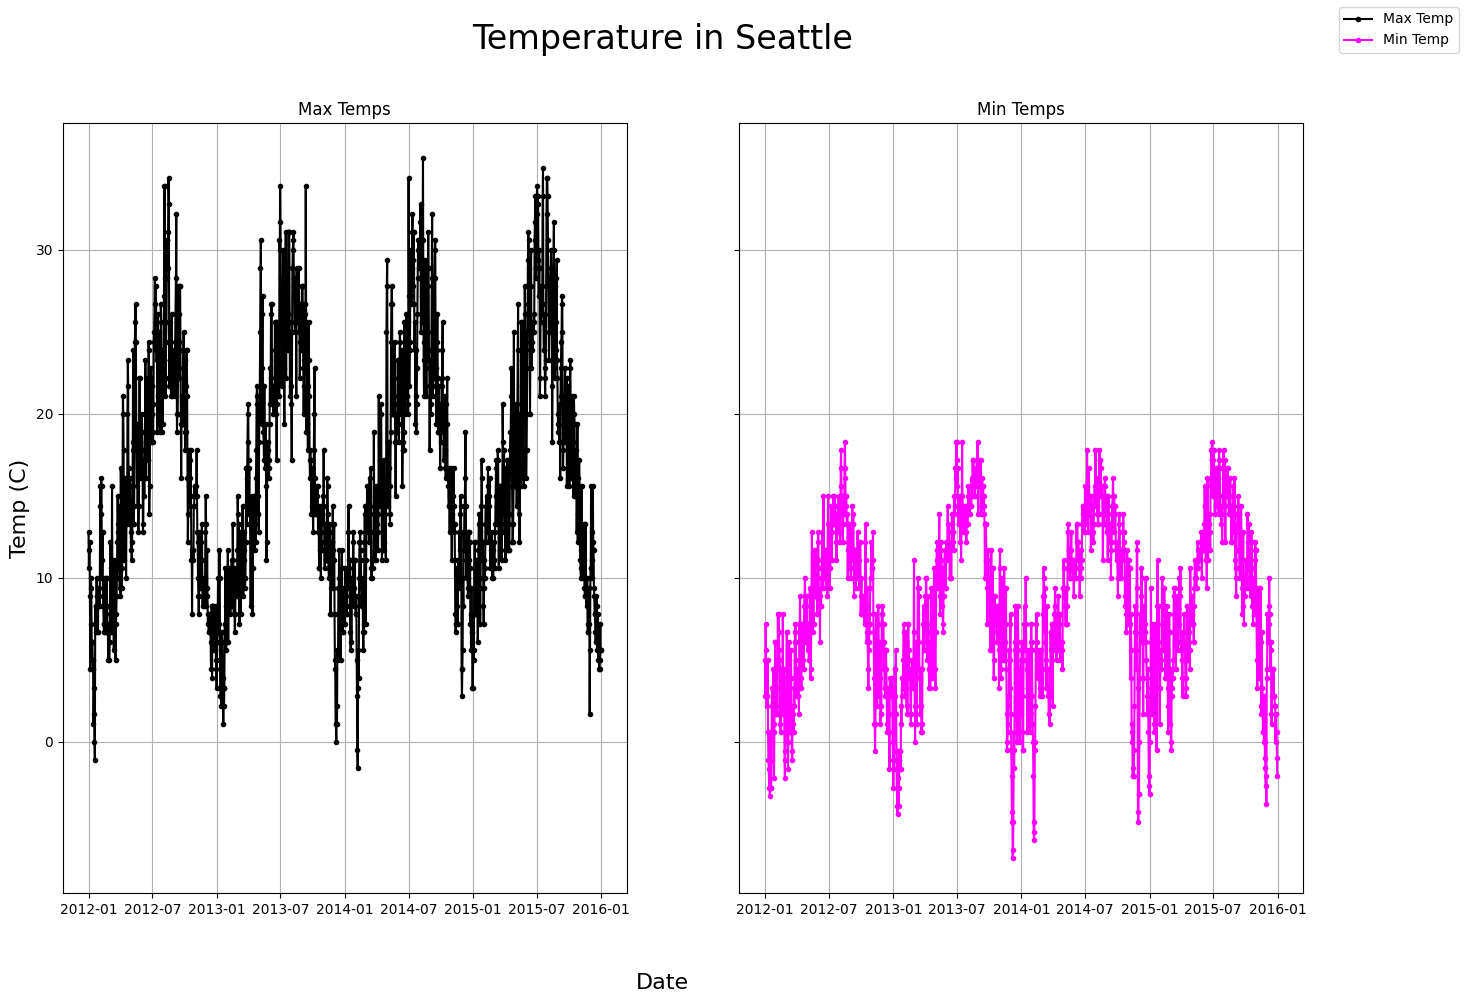

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16,10))
ax1.plot(pd.to_datetime(seattle_weather["date"]), seattle_weather["temp_max"], color="black", marker='.')
ax2.plot(pd.to_datetime(seattle_weather["date"]), seattle_weather["temp_min"],  color="magenta", marker='.')
ax1.set_title("Max Temps")
ax2.set_title("Min Temps")
ax1.set_ylabel("Temp (C)", size=16)
f.suptitle("Temperature in Seattle", size=24)
f.supxlabel("Date", size=16)
f.legend(["Max Temp", "Min Temp"])
ax1.grid(True)
ax2.grid(True)

También podemos usar ejes combinados si tenemos dos gráficas con escalas diferentes que queremos comparar.

Text(0, 0.5, 'Wind (MPH)')

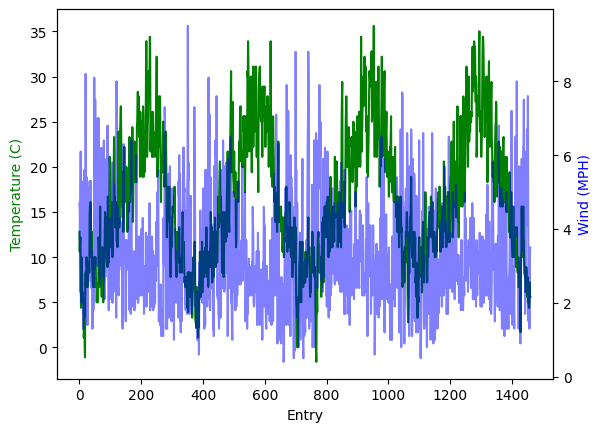

In [15]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(seattle_weather["temp_max"], color="g")
ax2.plot(seattle_weather["wind"], color="b", alpha=0.5)

ax1.set_xlabel('Entry')
ax1.set_ylabel("Temperature (C)", color='g')
ax2.set_ylabel("Wind (MPH)", color='b')

## Matplotlib: plt.bar()
Las gráficas de barras nos ayudan a visualizar proporciones y a contrastar diferencias en escalas entre valores. Usamos el comando:
- plt.bar(x, height)

Noten el cambio de "y" a "height". A diferencia de otros tipos de gráfica, es común usar una lista de strings para x. 

IMPORTANTE: **Todos** los comandos de matplotlib funcionan con **todos** los tipos de gráficas (i.e. xlabel, ytick, etc.)

<BarContainer object of 4 artists>

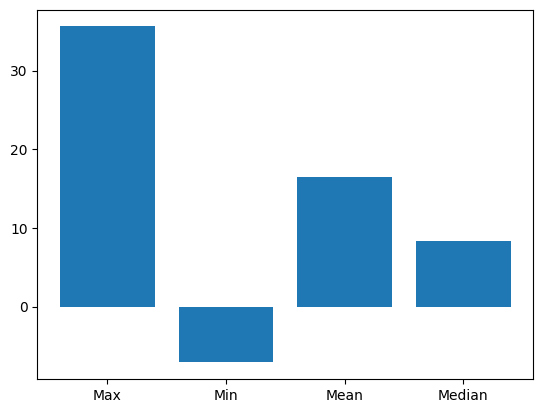

In [16]:
max_temp = seattle_weather["temp_max"].max()
min_temp = seattle_weather["temp_min"].min()
avg_temp = seattle_weather["temp_max"].mean()
median_temp = seattle_weather["temp_min"].median()
plt.bar(["Max", "Min","Mean","Median"], [max_temp, min_temp, avg_temp, median_temp])

A diferencia de plt.plot(), los colores los podemos especificar en una lista si queremos que cada barra sea de color diferente. Pueden ser strings o tuples RGB.

Text(0.5, 1.0, 'Temperature in Seattle')

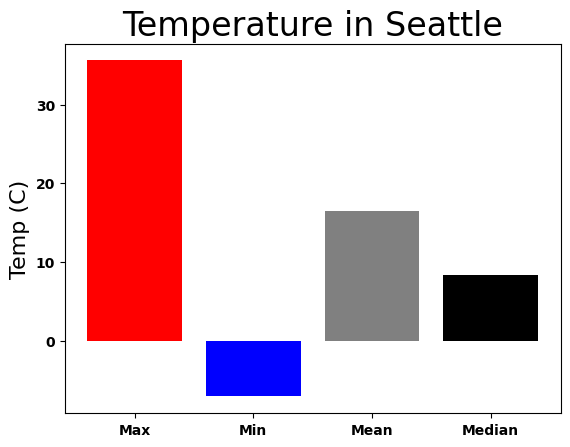

In [17]:
plt.bar(["Max", "Min","Mean","Median"], 
        [max_temp, min_temp, avg_temp, median_temp], 
        color=["red","blue","grey","black"],
       )
plt.ylabel("Temp (C)", size=16)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.title("Temperature in Seattle", size=24)

Podemos usar el parámetro "edgecolor" para definir un borde para las barras. Si estamos imprimiendo en blanco y negro, hasta podemos definir un patrón (hatch) para cada barra!
- color: color general, o lista de colores
- edgecolor: color de los bordes
- hatch: patrón interno
- fill: bool, si quieremos o no un color adentro de las barras

Text(0.5, 1.0, 'Temperature in Seattle')

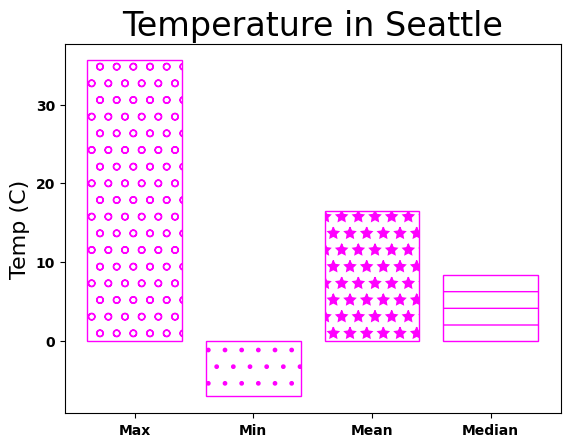

In [18]:
plt.bar(["Max", "Min","Mean","Median"], 
        [max_temp, min_temp, avg_temp, median_temp], 
        color=["red","blue","grey","black"],
        edgecolor="magenta",
        hatch=['o','.','*','-'],
        fill=False
       )
plt.ylabel("Temp (C)", size=16)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.title("Temperature in Seattle", size=24)

In [19]:
seattle_weather["weather"].value_counts().index

Index(['rain', 'sun', 'fog', 'drizzle', 'snow'], dtype='object', name='weather')

Text(0.5, 1.0, 'Weather in Seattle')

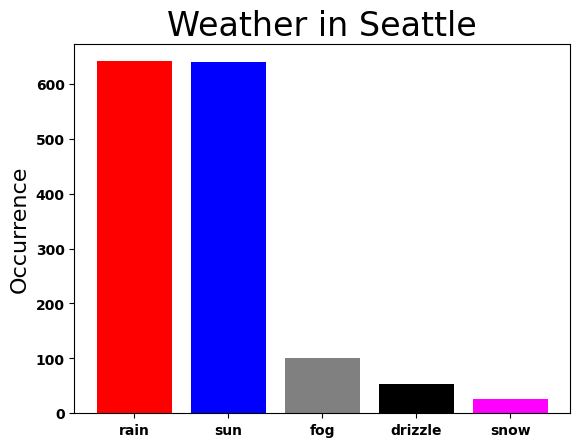

In [20]:
plt.bar(seattle_weather["weather"].value_counts().index[:],
        seattle_weather["weather"].value_counts()[:],
        color=["red","blue","grey","black","magenta"],
       )
plt.ylabel("Occurrence", size=16)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.title("Weather in Seattle", size=24)

## Seaborn: histplot()
Ahora, veamos algunas gráficas de Seaborn! Es importante recordar que **todos** los comandos de matplotlib **también funcionan con Seaborn!**. Esto altamente incrementa la varieded y complejidad de gráficas que puedes generar.

Comencemos con un histograma: Seaborn automáticamente puede generar el número de bins, y generar los nombres de los ejes.

C:\Users\rafae\Documents\New folder\clase\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rafae\Documents\New folder\clase\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='temp_max', ylabel='Count'>

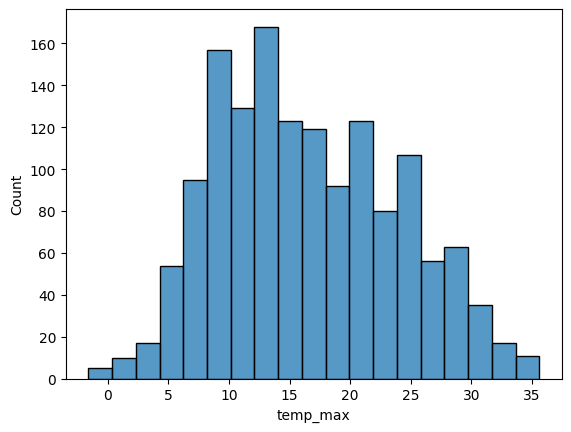

In [21]:
sns.histplot(seattle_weather["temp_max"])

Usemos algunos comandos de formato de matplotlib: No hay ningun problema.

C:\Users\rafae\Documents\New folder\clase\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rafae\Documents\New folder\clase\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


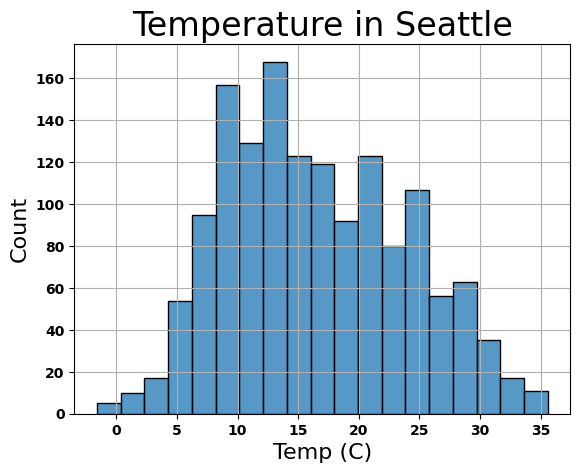

In [22]:
sns.histplot(seattle_weather["temp_max"])
plt.ylabel("Count", size=16)
plt.xlabel("Temp (C)", size=16)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.title("Temperature in Seattle", size=24)
plt.grid(True)

C:\Users\rafae\Documents\New folder\clase\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rafae\Documents\New folder\clase\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


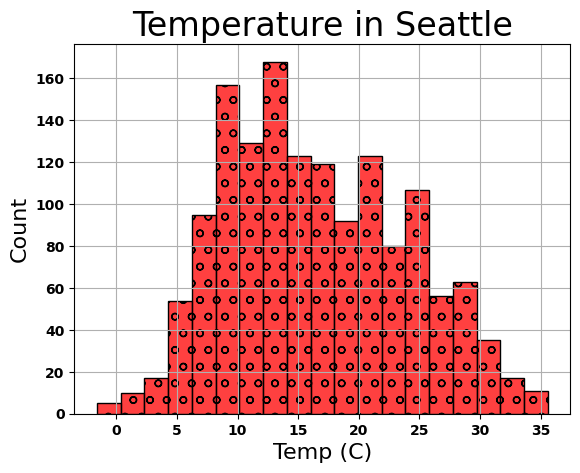

In [23]:
sns.histplot(seattle_weather["temp_max"],
            color='red',
            hatch='o',
            )
plt.ylabel("Count", size=16)
plt.xlabel("Temp (C)", size=16)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.title("Temperature in Seattle", size=24)
plt.grid(True)

Aunque Seaborn automáticamente detecta el número de bins según los datos, pero también podemos especificar un número en particular.

C:\Users\rafae\Documents\New folder\clase\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rafae\Documents\New folder\clase\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


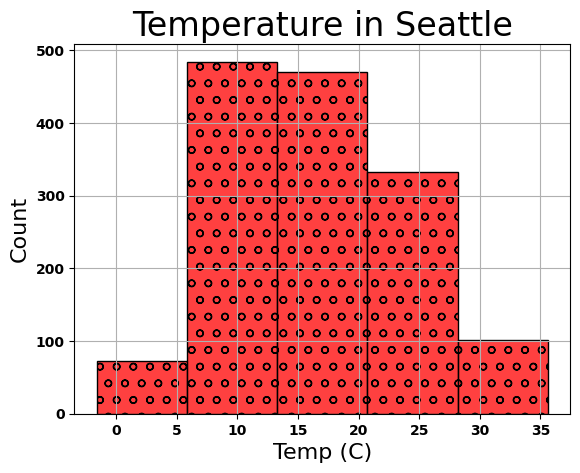

In [24]:
sns.histplot(seattle_weather["temp_max"],
            color='red',
            hatch='o',
            bins=5,
            )
plt.ylabel("Count", size=16)
plt.xlabel("Temp (C)", size=16)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.title("Temperature in Seattle", size=24)
plt.grid(True)

Algo que se puede ser útil es ver el contorno de nuestras barras. Para esto, usamos el parámetros "kde=True". Si queremos cambiar alguna propiedad de la línea, podemos pasar un diccionario de parámetros a "line_kws". Ojo: No podemos alterar el color del contorno aquí, pero lo podríamos gráficar en dos plots diferentes si quisieramos.

C:\Users\rafae\Documents\New folder\clase\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rafae\Documents\New folder\clase\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


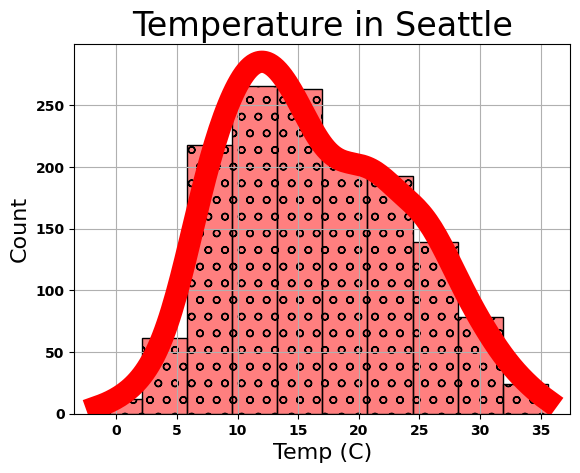

In [25]:
sns.histplot(seattle_weather["temp_max"],
            hatch='o',
            color='red',
            bins=10,
            kde=True,
            line_kws={'marker':'*',
                      'linewidth':16,
                     },
            )
plt.ylabel("Count", size=16)
plt.xlabel("Temp (C)", size=16)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.title("Temperature in Seattle", size=24)
plt.grid(True)

## Matplotlib: plt.scatter()
Las gráficas de dispersión nos permiten ver relaciones entre datos que no se pintan bien para graficar en línea. Aquí, por ejemplo, podemos usar plt.scatter(x,y) con datos muy diferentes pero aún así observar su relación. 

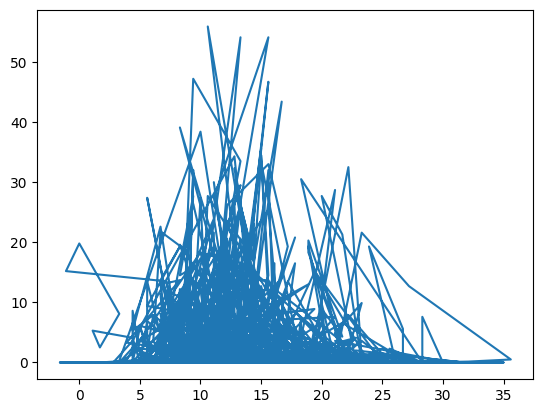

In [26]:
plt.plot(seattle_weather["temp_max"], seattle_weather["precipitation"])

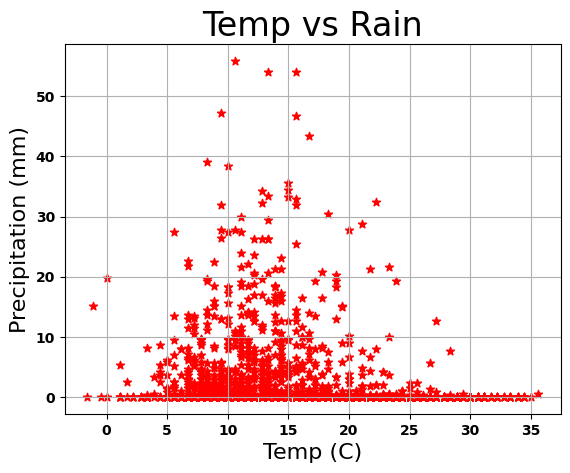

In [27]:
plt.scatter(seattle_weather["temp_max"], seattle_weather["precipitation"],
            marker="*",
            color="red",
           )
plt.xlabel("Temp (C)", size=16)
plt.ylabel("Precipitation (mm)", size=16)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.title("Temp vs Rain", size=24)
plt.grid(True)

Una de las mejores cosas aquí es la abilidad de graficar una dimensión adicional por medio de los colores que cada punto tiene. Esto funciona como una entrada adicional, c!
- c: Valor sobre el que varía el color
- cmap: Mapeo de colores. Abajo hay una gran lista!
- alpha: Transparencia, funciona con casi todos los elementos.

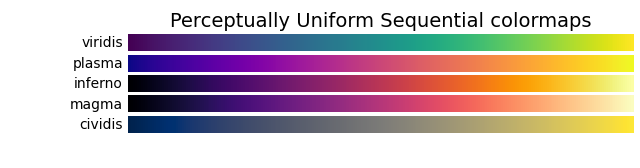
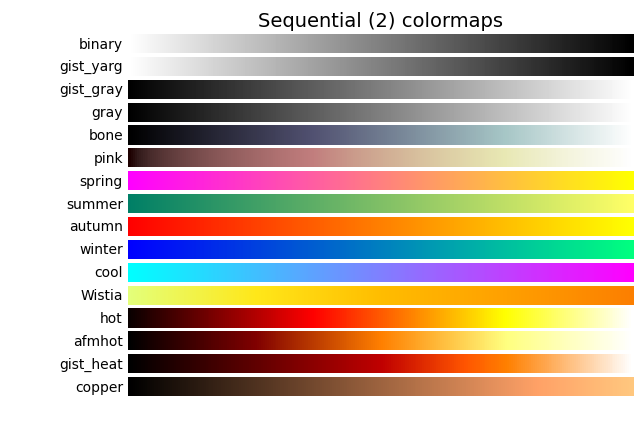
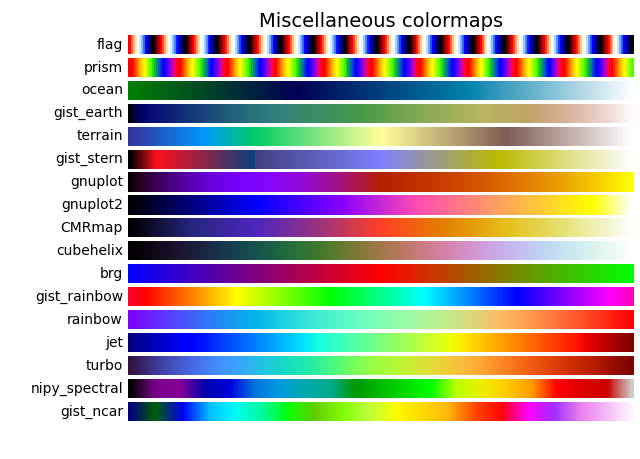

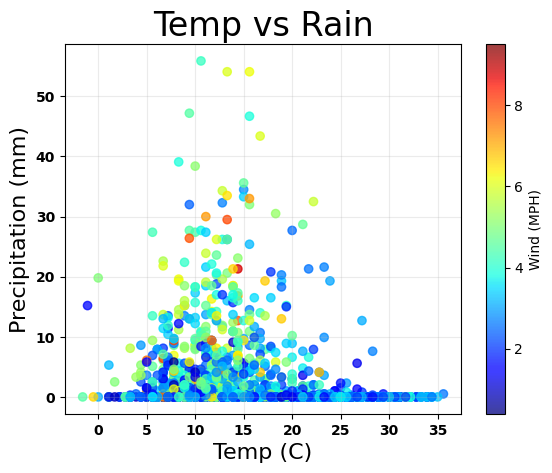

In [28]:
plt.scatter(seattle_weather["temp_max"], seattle_weather["precipitation"],
            marker="o",
            c = seattle_weather["wind"],
            cmap = 'jet',
            alpha = 0.75,
           )
plt.colorbar(label="Wind (MPH)")
plt.xlabel("Temp (C)", size=16)
plt.ylabel("Precipitation (mm)", size=16)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.title("Temp vs Rain", size=24)
plt.grid(True, alpha=0.25)

## Seaborn: sns.heatmap()
Los mapas de calor nos permiten rápidamente observar las relaciones dentro de una matriz de correlación, confusión, u otra en el que las celdas tengan escalas similares.

<Axes: >

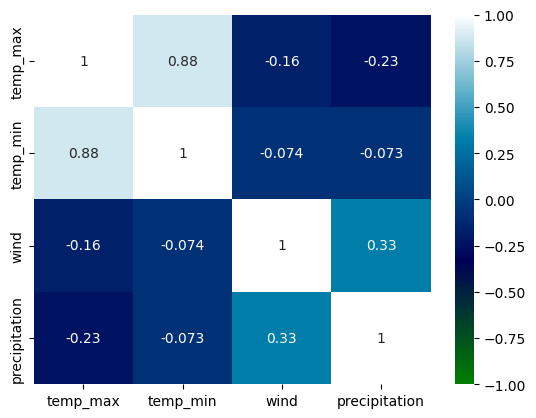

In [29]:
corrs = seattle_weather[["temp_max", "temp_min", "wind", "precipitation"]].corr()
sns.heatmap(corrs,
            cmap = "ocean",
            annot = True,
            vmax = 1,
            vmin = -1,
           )

## Seaborn: sns.boxplot()
Los boxplots nos permiten ver la estadística de los cuartiles y la mediana, agregando mucho valor a nuestras visualizaciones. Es fácil de usar con seaborn:
- sns.boxplot(dataframe)
- orient: Si es vertical ("v") u horizontal ("h")

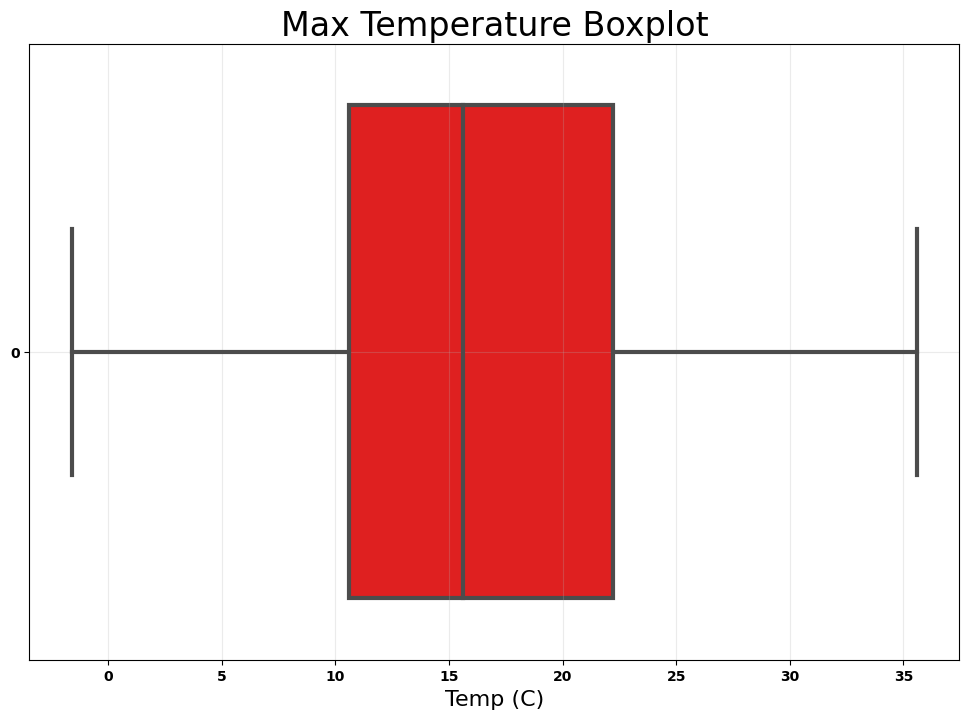

In [30]:
plt.figure(figsize=(12,8))
sns.boxplot(seattle_weather["temp_max"],
            orient='h',
            color='red',
            linewidth=3,
            
           )
plt.xlabel("Temp (C)", size=16)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.title("Max Temperature Boxplot", size=24)
plt.grid(True, alpha=0.25)

Una gran ventaja de usar Seaborn es que admite todo el dataframe sobre el que trabajas.

C:\Users\rafae\Documents\New folder\clase\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rafae\Documents\New folder\clase\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rafae\Documents\New folder\clase\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rafae\Documents\New folder\clase\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

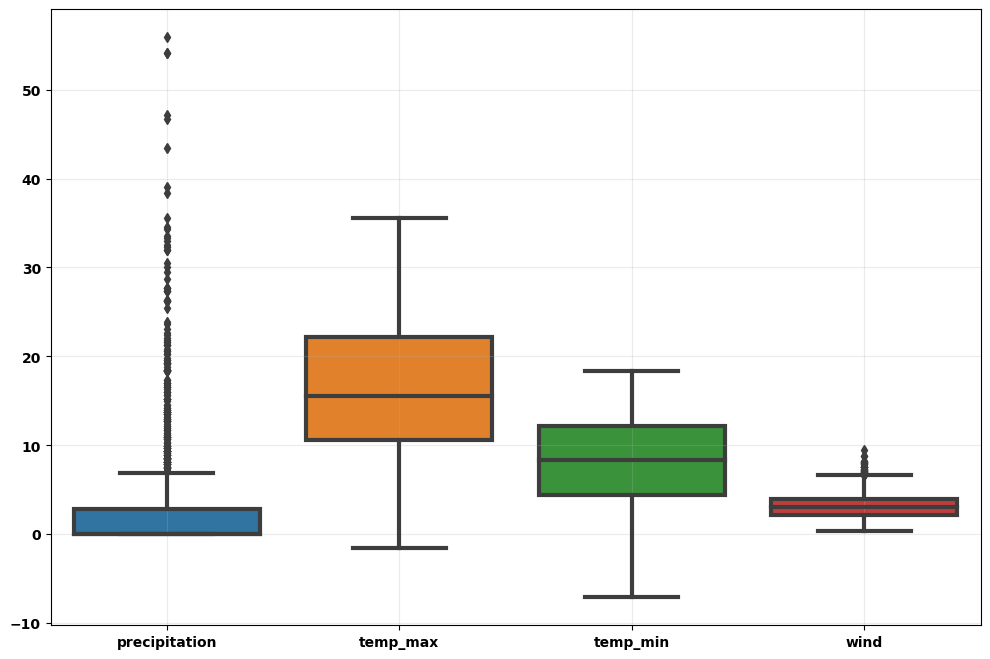

In [31]:
plt.figure(figsize=(12,8))
sns.boxplot(seattle_weather,
            linewidth=3,
            
           )
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.grid(True, alpha=0.25)

C:\Users\rafae\Documents\New folder\clase\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rafae\Documents\New folder\clase\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


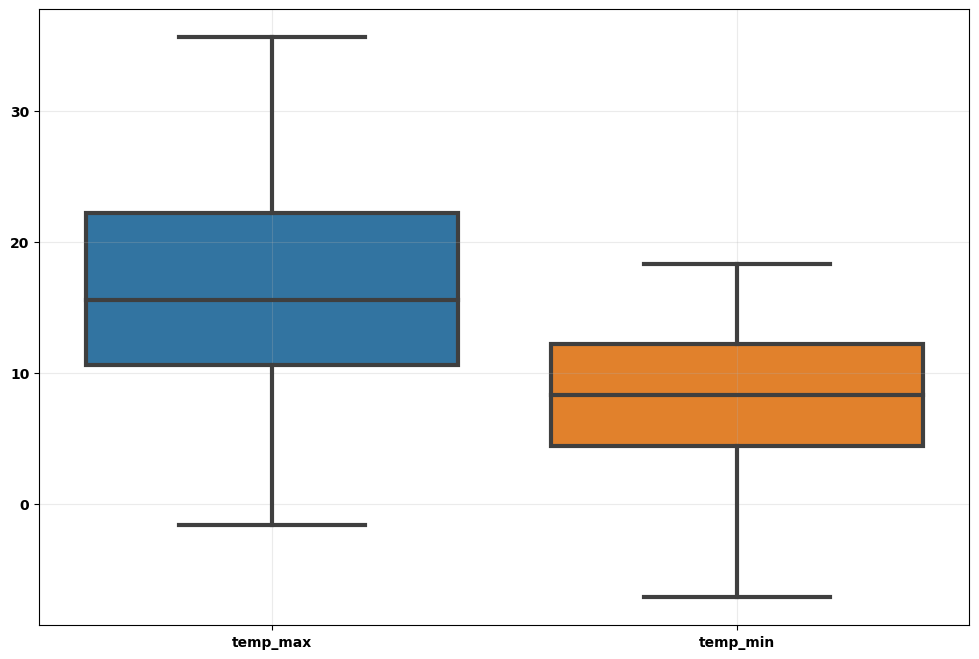

In [32]:
plt.figure(figsize=(12,8))
sns.boxplot(seattle_weather[["temp_max","temp_min"]],
            linewidth=3,
            
           )
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.grid(True, alpha=0.25)

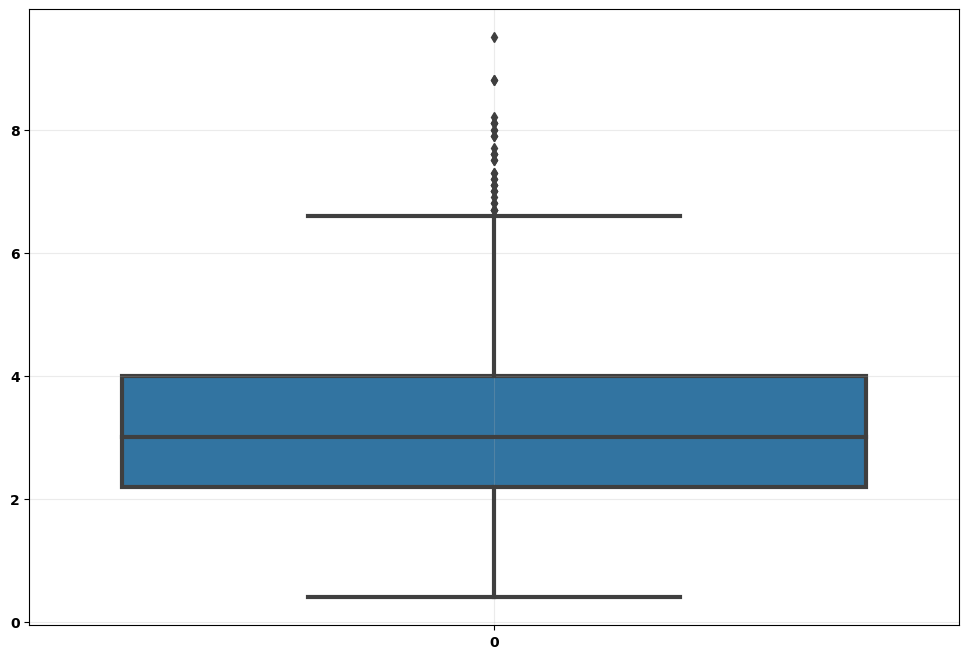

In [36]:
plt.figure(figsize=(12,8))
sns.boxplot(seattle_weather["wind"],
            linewidth=3,
            
           )
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.grid(True, alpha=0.25)

### Extra: Outliers
Vemos que precipitation tiene muchos datos atípicos. Podemos aislar estos usando la misma técnica matemática que usan los boxplots a partir del IQR. 

In [34]:
q1 = seattle_weather["precipitation"].quantile(0.25)
q3 = seattle_weather["precipitation"].quantile(0.75)
iqr = q3-q1
upper = q3+iqr*1.5
lower = q1-iqr*1.5
seattle_out = seattle_weather[(seattle_weather["precipitation"] > upper)|(seattle_weather["precipitation"] < lower)]

In [35]:
seattle_out

,date,precipitation,temp_max,temp_min,wind,weather
1,2012-01-02,10.9,10.6,2.8,4.5,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
16,2012-01-17,8.1,3.3,0.0,5.6,snow
17,2012-01-18,19.8,0.0,-2.8,5.0,snow
18,2012-01-19,15.2,-1.1,-2.8,1.6,snow
...,...,...,...,...,...,...
1441,2015-12-12,16.0,8.9,5.6,5.6,rain
1446,2015-12-17,21.8,6.7,3.9,6.0,rain
1447,2015-12-18,18.5,8.9,4.4,5.1,rain
1450,2015-12-21,27.4,5.6,2.8,4.3,rain


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
seattle_weather['weather']

0       drizzle
1          rain
2          rain
3          rain
4          rain
         ...   
1456       rain
1457       rain
1458        fog
1459        sun
1460        sun
Name: weather, Length: 1461, dtype: object

In [10]:
le.fit(seattle_weather['weather'])

LabelEncoder()

In [11]:
a = le.transform(seattle_weather['weather'])

In [12]:
seattle_weather['integer_encoder'] = pd.DataFrame(a)

In [13]:
seattle_weather

,date,precipitation,temp_max,temp_min,wind,weather,integer_encoder
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,0
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2
...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,2
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,2
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,1
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,4


In [14]:
le.inverse_transform(a)

array(['drizzle', 'rain', 'rain', ..., 'fog', 'sun', 'sun'], dtype=object)